In [2]:
setwd('C:/Users/bki19/OneDrive/deskto/Linear_Regression/data')

In [3]:
df<-read.csv('./Acetylene.csv')

In [4]:
colnames(df)<-c('y','x1','x2','x3')

# Multicollinearity

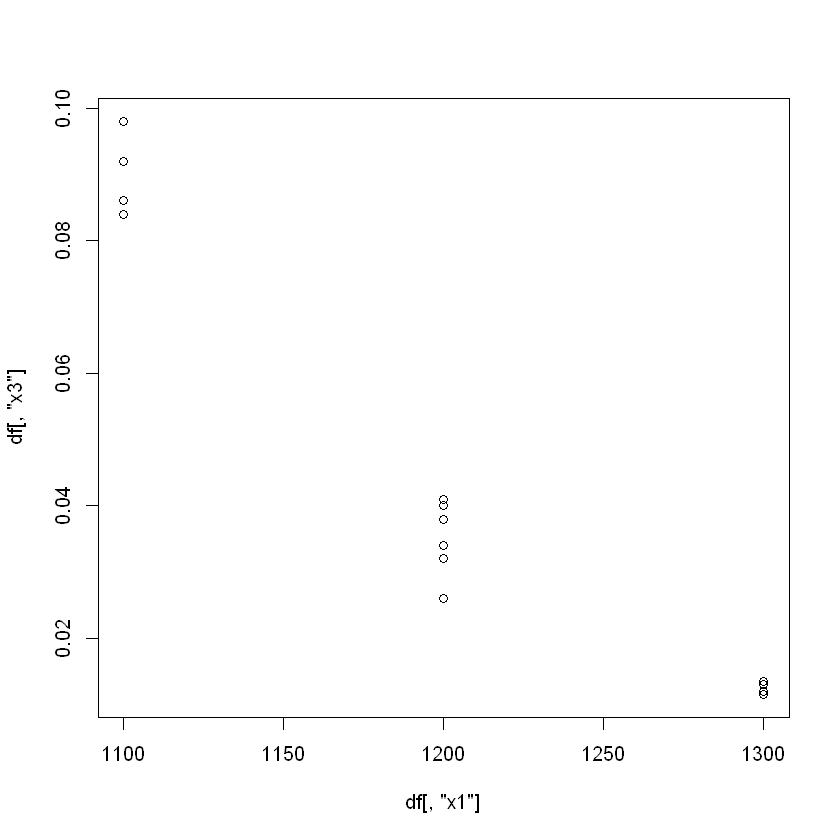

In [5]:
plot(df[,'x1'],df[,'x3'])

두 regressor가 highly correlated

In [6]:
df2<-data.frame(P=df$y,T=(df$x1-1212.50)/80.623,H=(df$x2-12.44)/5.662,C=(df$x3-0.0403)/0.03164   )

In [7]:
df2$TH<-df2$T*df2$H
df2$TC<-df2$T*df2$C
df2$HC<-df2$H*df2$C
df2$T2<-df2$T^2
df2$H2<-df2$H^2
df2$C2<-df2$C^2

Unit normal scailing

In [8]:
P_hat<-lm(P~T+H+C+TH+TC+HC+T2+H2+C2,data=df2)

In [9]:
summary(P_hat)


Call:
lm(formula = P ~ T + H + C + TH + TC + HC + T2 + H2 + C2, data = df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3499 -0.3411  0.1297  0.5011  0.6720 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  35.8971     1.0903  32.925 5.22e-08 ***
T             4.0187     4.5012   0.893 0.406340    
H             2.7811     0.3074   9.046 0.000102 ***
C            -8.0311     6.0657  -1.324 0.233703    
TH           -6.4568     1.4660  -4.404 0.004547 ** 
TC          -26.9818    21.0224  -1.283 0.246663    
HC           -3.7683     1.6554  -2.276 0.063116 .  
T2          -12.5237    12.3239  -1.016 0.348741    
H2           -0.9727     0.3746  -2.597 0.040844 *  
C2          -11.5943     7.7070  -1.504 0.183182    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9014 on 6 degrees of freedom
Multiple R-squared:  0.9977,	Adjusted R-squared:  0.9943 
F-statistic: 289.7 on 9 and 6 DF,  p-value: 3.225

In [10]:
cor(df2[,-1])

,T,H,C,TH,TC,HC,T2,H2,C2
T,1.00000000,0.22362776,-0.95820405,-0.13168160,0.4431776,0.20493411,-0.2707456,0.03120928,-0.5771841
H,0.22362776,1.00000000,-0.24023098,0.03885892,0.1923236,-0.02278952,-0.1477108,0.49844734,-0.2239588
C,-0.95820405,-0.24023098,1.00000000,0.19428701,-0.6608196,-0.27350468,0.5009622,-0.01778787,0.7654718
TH,-0.13168160,0.03885892,0.19428701,1.00000000,-0.2645513,-0.97447326,0.2461338,0.39776930,0.2743512
TC,0.44317757,0.19232364,-0.66081962,-0.26455134,1.0000000,0.32318565,-0.9721738,0.12597543,-0.9721673
HC,0.20493411,-0.02278952,-0.27350468,-0.97447326,0.3231856,1.00000000,-0.2790099,-0.37427299,-0.3581116
T2,-0.27074558,-0.14771083,0.50096224,0.24613382,-0.9721738,-0.27900992,1.0000000,-0.12369389,0.8935237
H2,0.03120928,0.49844734,-0.01778787,0.39776930,0.1259754,-0.37427299,-0.1236939,1.00000000,-0.1580735
C2,-0.57718413,-0.22395879,0.76547178,0.27435119,-0.9721673,-0.35811161,0.8935237,-0.15807353,1.0000000


T와 C간의 높은 상관관계 등 regressor 간의 높은 상관관계<br>
상관분석은 pair-wise correlation만 찾을 수 있을 뿐 여러 개의 regressor가 연관 된 near-linear dependence는 못 봄<br>

<b>VIF <br></b>

In [11]:
library(car)

Warning message:
"package 'car' was built under R version 3.5.3"Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.5.2"

In [12]:
vif(P_hat)

T           H           C          TH          TC          HC 
 374.000312    1.744610  679.106087   31.030921 6565.906729   35.595126 
         T2          H2          C2 
1762.575365    3.168096 1158.128657

<b>Eigensystem <br></b>

In [13]:
X=as.matrix(df2[,-1])

T와 C가 들어가는 변수의 VIF가 매우 높음 ; 어떤 regressor가 multicollinearity에 연관된지 알 수 있음
polynomial term 같은 경우 centering 하면 VIF가 낮아질 수 있음

In [14]:
A<-eigen(t(X)%*%X )
A

eigen() decomposition
$values
[1] 95.576825221 37.828260543 21.379950103 14.950983375  8.677445377
[6]  0.620886979  0.405349960  0.147670207  0.001206493

$vectors
             [,1]          [,2]        [,3]         [,4]        [,5]
 [1,] -0.16172735 -0.3721760541  0.50656168 -0.319879302 -0.08153367
 [2,] -0.02965619 -0.4024037219 -0.09603629  0.474846424 -0.77575321
 [3,]  0.21115361  0.3828747368 -0.43164702  0.257988146 -0.01658086
 [4,]  0.18570715 -0.1853945620 -0.38331234 -0.535454012 -0.18328852
 [5,] -0.49267656 -0.0858077793 -0.25709868 -0.004816269  0.09189567
 [6,] -0.19779143  0.1473540866  0.37196628  0.478841737  0.18487261
 [7,]  0.46331591 -0.0009513821  0.35507528 -0.026371332 -0.06879143
 [8,]  0.32588459 -0.6794024665 -0.20527722  0.296877150  0.54489768
 [9,]  0.53960888  0.1671143418  0.16807430  0.028020128 -0.11584973
             [,6]         [,7]         [,8]         [,9]
 [1,] -0.14385738  0.654339279  0.016859056 -0.143579041
 [2,]  0.01080286 -0.023290706 

In [15]:
max(A$values)/min(A$values)

[1] 79218.7

condition number가 1000을 넘어 심각한 multicollinearity

In [16]:
max(A$values)/A$values

[1]     1.000000     2.526598     4.470395     6.392678    11.014397
[6]   153.935947   235.788417   647.231606 79218.697017

condition indices가 1000이 넘는게 하나 있는 것으로 보아 최소 한 개의 strong-near linear dependence 있음<br>
아까 x1과 x3의 correlation이 높았던 것과 상응하는 결과

Centering이 중요한 이유는 intercept를 다른 regressor들에 orthogonal하게 만들어줘 모형의 constant term 때문에 왜곡되는 것을 막아줌

In [17]:
#library(peturb)
#colldiag(P_hat)

<b>Ridge Regression <br></b>

Muticollinearity로 coef의 variance 커지고 estimates는 너무 길어짐. 따라서 coef의 estimates의 절대값 너무 커져 unstable 해짐<br>
따라서 추정된 회귀계수의 크기나 sign이 왜곡될 수 있음

In [18]:
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



In [19]:
lambdas <- 10^seq(3, -2, by = -.1)
fit_ridge <- glmnet(X, df2[,1], alpha = 0, lambda = lambdas)
summary(fit_ridge)

          Length Class     Mode   
a0         51    -none-    numeric
beta      459    dgCMatrix S4     
df         51    -none-    numeric
dim         2    -none-    numeric
lambda     51    -none-    numeric
dev.ratio  51    -none-    numeric
nulldev     1    -none-    numeric
npasses     1    -none-    numeric
jerr        1    -none-    numeric
offset      1    -none-    logical
call        5    -none-    call   
nobs        1    -none-    numeric

In [20]:
cv_fit <- cv.glmnet(X, df2[,1], alpha = 0, lambda = lambdas)

Warning message:
"Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold"

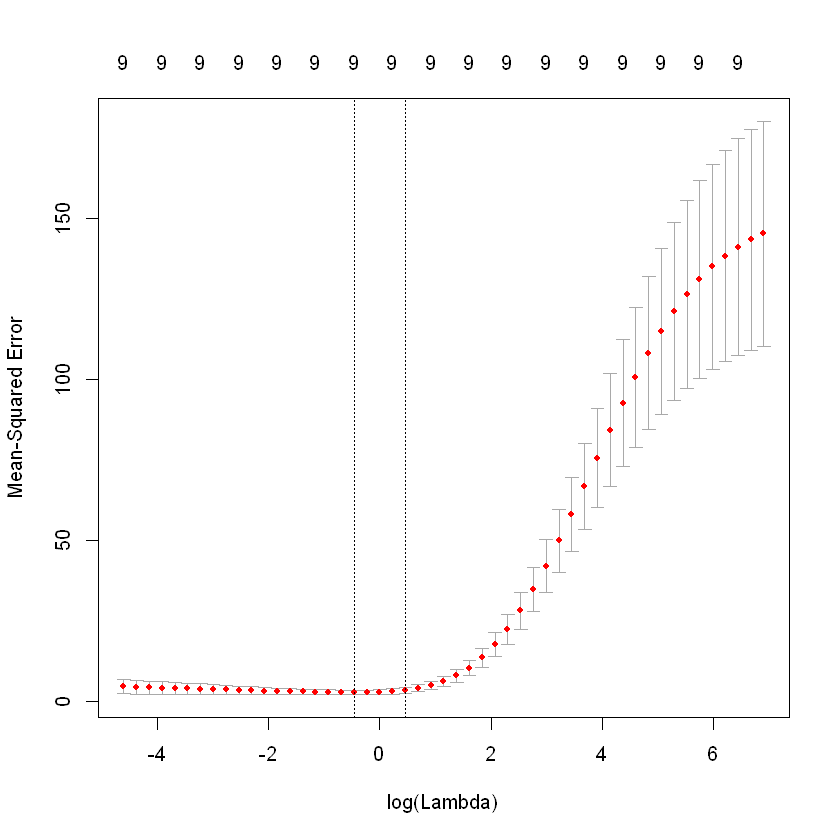

In [21]:
plot(cv_fit)

In [22]:
opt_lambda <- cv_fit$lambda.min
opt_lambda

[1] 0.6309573

In [23]:
fit_ridge <- glmnet(X, df2[,1], alpha = 0, lambda = opt_lambda)

In [24]:
coef(fit_ridge);coef(P_hat)

10 x 1 sparse Matrix of class "dgCMatrix"
                    s0
(Intercept) 35.0730596
T            6.1740883
H            2.4759478
C           -4.5111788
TH          -2.6539748
TC          -0.8085342
HC           0.6524082
T2           1.8866008
H2          -0.5049942
C2          -0.3038628

(Intercept)           T           H           C          TH          TC 
 35.8971253   4.0187347   2.7810741  -8.0310509  -6.4567708 -26.9817889 
         HC          T2          H2          C2 
 -3.7682899 -12.5237238  -0.9727116 -11.5943028

T,C에 관한 regressor들 작아지고 T2의 경우 부호가 바뀌었음

<b>PCA <br></b>

In [26]:
fit_pca<-prcomp(X)

In [27]:
fit_pca

Standard deviations (1, .., p=9):
[1] 1.934172292 1.424859771 1.022420816 0.958246255 0.638063693 0.202599384
[7] 0.102172721 0.071150275 0.008810393

Rotation (n x k) = (9 x 9):
           PC1         PC2        PC3         PC4         PC5         PC6
T  -0.39047851  0.03215621 -0.6004482  0.19163180 -0.17693920 -0.22512570
H  -0.16410601  0.40876403  0.1798330  0.64367101  0.59838054  0.01820555
C   0.46114924 -0.01216581  0.4339286 -0.06315449  0.03529983  0.01697695
TH  0.17078316  0.44486420 -0.3065162 -0.39192597  0.24217590  0.33120306
TC -0.41790800  0.01669996  0.2422642 -0.29830418  0.13532281 -0.07892584
HC -0.19421796 -0.40835287  0.2624698  0.35890624 -0.25123860  0.29376532
T2  0.32640586 -0.01168714 -0.3185710  0.32593957 -0.16494421  0.58556703
H2 -0.06261684  0.68234320  0.2662815  0.09892034 -0.66468964 -0.05842913
C2  0.50590599 -0.03264955 -0.1577977  0.23989480 -0.01691171 -0.63259246
            PC7         PC8          PC9
T  -0.240723801 -0.53404326  0.155217445

In [28]:
#loadings
fit_pca$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
T,-0.39047851,0.03215621,-0.6004482,0.19163180,-0.17693920,-0.22512570,-0.240723801,-0.53404326,0.155217445
H,-0.16410601,0.40876403,0.1798330,0.64367101,0.59838054,0.01820555,-0.011736834,-0.02813266,-0.002998862
C,0.46114924,-0.01216581,0.4339286,-0.06315449,0.03529983,0.01697695,-0.215752494,-0.70864230,0.211313857
TH,0.17078316,0.44486420,-0.3065162,-0.39192597,0.24217590,0.33120306,-0.578962898,0.14772378,0.002408339
TC,-0.41790800,0.01669996,0.2422642,-0.29830418,0.13532281,-0.07892584,0.013858126,0.14055371,0.795554986
HC,-0.19421796,-0.40835287,0.2624698,0.35890624,-0.25123860,0.29376532,-0.638711968,0.20093681,0.008702531
T2,0.32640586,-0.01168714,-0.3185710,0.32593957,-0.16494421,0.58556703,0.312858832,0.03770099,0.464974409
H2,-0.06261684,0.68234320,0.2662815,0.09892034,-0.66468964,-0.05842913,0.003638164,0.06737665,0.004085621
C2,0.50590599,-0.03264955,-0.1577977,0.23989480,-0.01691171,-0.63259246,-0.232654702,0.35202018,0.286422488


T: orthogonal matrix (each column is Eigenvector), all called loadings

In [29]:
#Principal Component
fit_pca$x

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
-1.0356977,-1.356090537,-0.6979339,0.5662356,-1.20878239,-0.11937031,0.074899960,0.048927777,0.0020021172
-0.9594960,-1.290674540,-0.9050249,0.5002401,-0.66046917,-0.06601923,0.055247629,0.009916651,-0.0017640057
-0.8580390,-1.057128312,-1.1374605,0.4482438,-0.07889233,-0.02341744,0.023808642,-0.007751581,-0.0146736552
-0.8126348,-0.520160010,-1.2696892,0.3621377,0.42986770,0.07952536,0.002153416,-0.086308888,0.0084897329
-0.7503548,0.663218242,-1.3221542,0.3583284,0.68853805,0.14018992,-0.055634118,-0.086168427,0.0154720351
-0.6721291,3.938607943,-1.0354329,0.5538669,-0.04211648,0.03642151,-0.103547653,0.101880597,-0.0092592033
-0.9746688,-0.122064400,0.7591802,-1.4769666,-0.93647260,0.02566089,-0.141898812,-0.023095361,0.0049181492
-1.0374260,-0.575946632,0.6144096,-1.2644719,-0.18145952,0.07120597,-0.134903962,-0.040438776,-0.0034040540
-1.1798570,-0.841806290,0.4851491,-0.8782944,0.62359164,0.04665415,-0.064768140,0.042622645,-0.0067909959
-1.2639715,-0.651823788,0.4413871,-0.5888020,0.92393268,-0.10193066,0.076039683,0.173880565,0.0123967671


Z: principal component or factor,pc scores<br>
Z=XT<br>
transform the original regressors into an orthogonal set of variables
Principal component estimator는 위의 pricipal component의 subset을 이용해 multicollinearity 효과를 줄임

In [30]:
#eigenvalue
fit_pca$sdev^2

[1] 3.741022e+00 2.030225e+00 1.045344e+00 9.182359e-01 4.071253e-01
[6] 4.104651e-02 1.043926e-02 5.062362e-03 7.762302e-05

eigen value: j번째 principal component의 variance로 6,7,8,9 eigen value가 매우 낮아 제거

In [31]:
fit_pca$x

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
-1.0356977,-1.356090537,-0.6979339,0.5662356,-1.20878239,-0.11937031,0.074899960,0.048927777,0.0020021172
-0.9594960,-1.290674540,-0.9050249,0.5002401,-0.66046917,-0.06601923,0.055247629,0.009916651,-0.0017640057
-0.8580390,-1.057128312,-1.1374605,0.4482438,-0.07889233,-0.02341744,0.023808642,-0.007751581,-0.0146736552
-0.8126348,-0.520160010,-1.2696892,0.3621377,0.42986770,0.07952536,0.002153416,-0.086308888,0.0084897329
-0.7503548,0.663218242,-1.3221542,0.3583284,0.68853805,0.14018992,-0.055634118,-0.086168427,0.0154720351
-0.6721291,3.938607943,-1.0354329,0.5538669,-0.04211648,0.03642151,-0.103547653,0.101880597,-0.0092592033
-0.9746688,-0.122064400,0.7591802,-1.4769666,-0.93647260,0.02566089,-0.141898812,-0.023095361,0.0049181492
-1.0374260,-0.575946632,0.6144096,-1.2644719,-0.18145952,0.07120597,-0.134903962,-0.040438776,-0.0034040540
-1.1798570,-0.841806290,0.4851491,-0.8782944,0.62359164,0.04665415,-0.064768140,0.042622645,-0.0067909959
-1.2639715,-0.651823788,0.4413871,-0.5888020,0.92393268,-0.10193066,0.076039683,0.173880565,0.0123967671


X%*%t(fit_pca$rotation)

[1] 56.11534